#### Exercise for part 4: Classifying the MNIST dataset
- This dataset contains images of hand-written digits from 0 to 9
- Our task is given these sets of images, classify them into the correct categorical of number from 0 --> 9
- Fun note: Classifying MNIST dataset is considered one of the "hello world" example to Machine Learning, this dataset was clean enough that you do not have to perform analysis over missing values, invalid data etc... However it is still challenging (if you look at the dataset itself) to benchmark several ML algorithms. http://yann.lecun.com/exdb/mnist/

In [1]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

from sklearn.datasets import fetch_openml

In [2]:
mnist_dataset = fetch_openml('mnist_784', version=1)
mnist_dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Extract the input features X and the target label Y

In [3]:
X, y = mnist_dataset['data'], mnist_dataset['target']
X.shape, y.shape

((70000, 784), (70000,))

An image is a 2-dimensional array of numbers where each of the number represents the "darkness" of the pixel. A value of zero indicates a white pixel and a value of 255 represents a dark pixel. 
Each image in MNIST was flattened out into a vector of size (784,). So in order to view the image in its original form, we need to reshape it back into a 2D matrix.

In [4]:
image_vector = X[0]
digit_image = image_vector.reshape(28, 28)

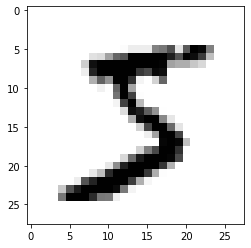

Label for X[0]: 5


In [5]:
# visualise the image to see the digit, this looks like a 5
plt.imshow(digit_image, cmap=mpl.cm.binary)
plt.show()

# let's print out the actual label of this digit
print('Label for X[0]:',y[0]) 
# since y[0] is of type string, we need to convert into integers
y = y.astype(np.uint8)

In [6]:
type(y[0])

numpy.uint8

In [7]:
# Write a function to display an image of the digit so we can reuse it later on
def plot_digit(img_vector):
    digit_image = img_vector.reshape(28, 28)
    plt.imshow(digit_image, cmap=mpl.cm.binary)
    plt.show()

You can actually print out a few more digits to see how challenging it is to recognise these hand-written digits from the images
<center><img src='./assets/mnist_images.png' width="500"></center>

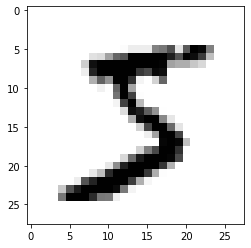

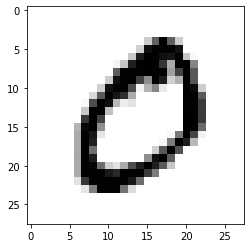

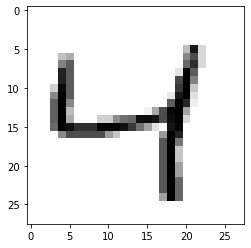

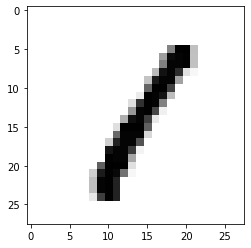

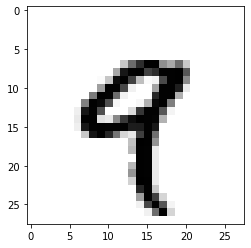

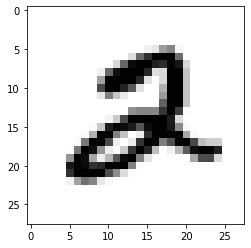

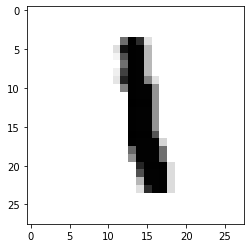

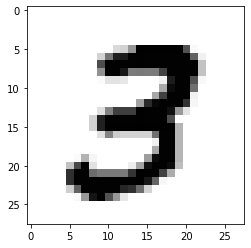

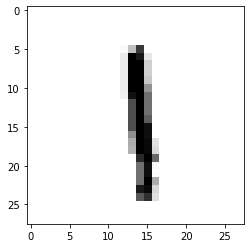

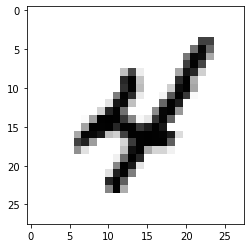

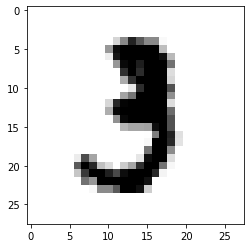

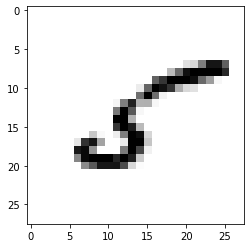

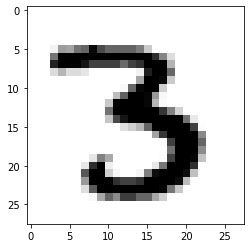

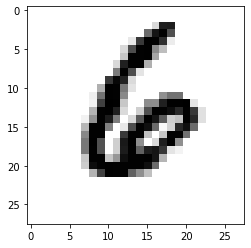

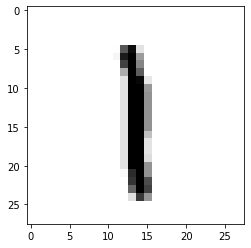

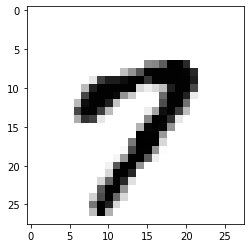

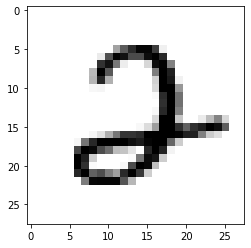

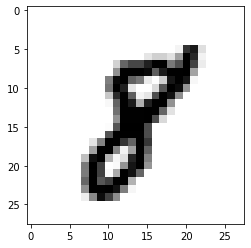

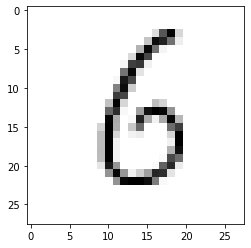

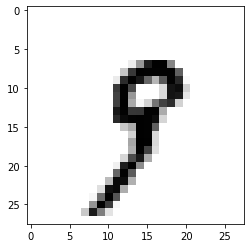

In [8]:
# the first 20 vector does include a variety of digits, so we don't have to shuffle them ourselves
for i in range(20):
    plot_digit(X[i])

Since we have a lot of images, let's take the first 60000 images for training and uses the remaining 10000 images for testing the model. It is important to know that the dataset was already shuffled so we do not have to go through that process. If all the digits of the same type are grouped together we have to shuffle them so cross-validation can work. ML models are trained better if each instance is independent from another, except for time series data.

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [12]:
import time

Sparsity with L1 penalty: 31.73%
Test score with L1 penalty: 0.8907
Example run in 12.865 s


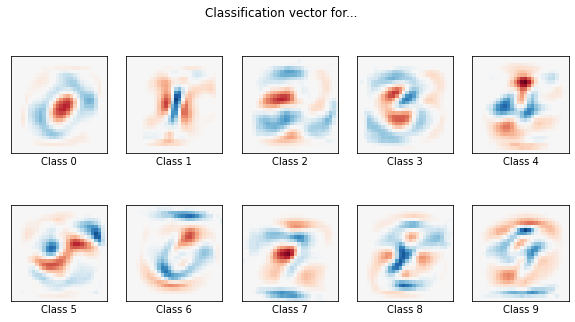

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

t0 = time.time()

# Turn up tolerance for faster convergence
clf = LogisticRegression(
    C=50. / 5000, penalty='l1', solver='saga', tol=0.1
)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()